Filter-Bank

In [1]:
from modules.filterbank import FilterBank
from modules.detectFQRS import DetectFQRS
import numpy as np

#get data
raw_direct_fecg_data, raw_abdecg_data_c1, _, _, _ = np.loadtxt('csv_data/r04.csv', delimiter=',', unpack=True).tolist()
data = np.asarray(raw_abdecg_data_c1)
crop_data = data[7000:12000]

#config params, attr
frequency_sampling = 1000
FQRS_detector = DetectFQRS(frequency_sampling=frequency_sampling, data=crop_data)

#1 preprocess
preprocessed_data = FQRS_detector.preprocess(data=crop_data, cutoff_low=15, cutoff_high=2, filter_order=2)
#2 detectQRS
# max_local_extremas= FQRS_detector.detect_QRS(data=preprocessed_data)
from scipy.signal import argrelextrema

max_local_extremas = argrelextrema(preprocessed_data, np.greater)
max_local_extremas, len(preprocessed_data)

((array([   3,    9,   35,   54,   95,  117,  144,  158,  203,  235,  257,
          303,  337,  361,  384,  408,  439,  468,  514,  568,  588,  616,
          665,  694,  707,  750,  781,  807,  823,  840,  857,  879,  917,
          958,  985, 1017, 1061, 1073, 1138, 1160, 1181, 1195, 1218, 1227,
         1250, 1290, 1337, 1359, 1386, 1408, 1433, 1464, 1476, 1500, 1521,
         1566, 1612, 1719, 1772, 1804, 1816, 1822, 1859, 1881, 1901, 1940,
         1972, 1987, 2006, 2028, 2065, 2088, 2120, 2167, 2237, 2259, 2272,
         2292, 2315, 2357, 2386, 2410, 2475, 2540, 2562, 2602, 2610, 2638,
         2670, 2742, 2824, 2849, 2873, 2898, 2948, 2985, 3038, 3077, 3125,
         3171, 3190, 3220, 3266, 3349, 3379, 3421, 3447, 3461, 3496, 3515,
         3533, 3568, 3580, 3612, 3665, 3733, 3763, 3815, 3967, 4034, 4052,
         4088, 4128, 4146, 4164, 4204, 4253, 4277, 4308, 4354, 4458, 4491,
         4506, 4521, 4554, 4578, 4633, 4692, 4731, 4758, 4809, 4827, 4858,
         4906]),),
 5000)

[6.000e-03 1.800e-02 7.000e-02 1.080e-01 1.900e-01 2.340e-01 2.880e-01
 3.160e-01 4.060e-01 4.700e-01 5.140e-01 6.060e-01 6.740e-01 7.220e-01
 7.680e-01 8.160e-01 8.780e-01 9.360e-01 1.028e+00 1.136e+00 1.176e+00
 1.232e+00 1.330e+00 1.388e+00 1.414e+00 1.500e+00 1.562e+00 1.614e+00
 1.646e+00 1.680e+00 1.714e+00 1.758e+00 1.834e+00 1.916e+00 1.970e+00
 2.034e+00 2.122e+00 2.146e+00 2.276e+00 2.320e+00 2.362e+00 2.390e+00
 2.436e+00 2.454e+00 2.500e+00 2.580e+00 2.674e+00 2.718e+00 2.772e+00
 2.816e+00 2.866e+00 2.928e+00 2.952e+00 3.000e+00 3.042e+00 3.132e+00
 3.224e+00 3.438e+00 3.544e+00 3.608e+00 3.632e+00 3.644e+00 3.718e+00
 3.762e+00 3.802e+00 3.880e+00 3.944e+00 3.974e+00 4.012e+00 4.056e+00
 4.130e+00 4.176e+00 4.240e+00 4.334e+00 4.474e+00 4.518e+00 4.544e+00
 4.584e+00 4.630e+00 4.714e+00 4.772e+00 4.820e+00 4.950e+00 5.080e+00
 5.124e+00 5.204e+00 5.220e+00 5.276e+00 5.340e+00 5.484e+00 5.648e+00
 5.698e+00 5.746e+00 5.796e+00 5.896e+00 5.970e+00 6.076e+00 6.154e+00
 6.250

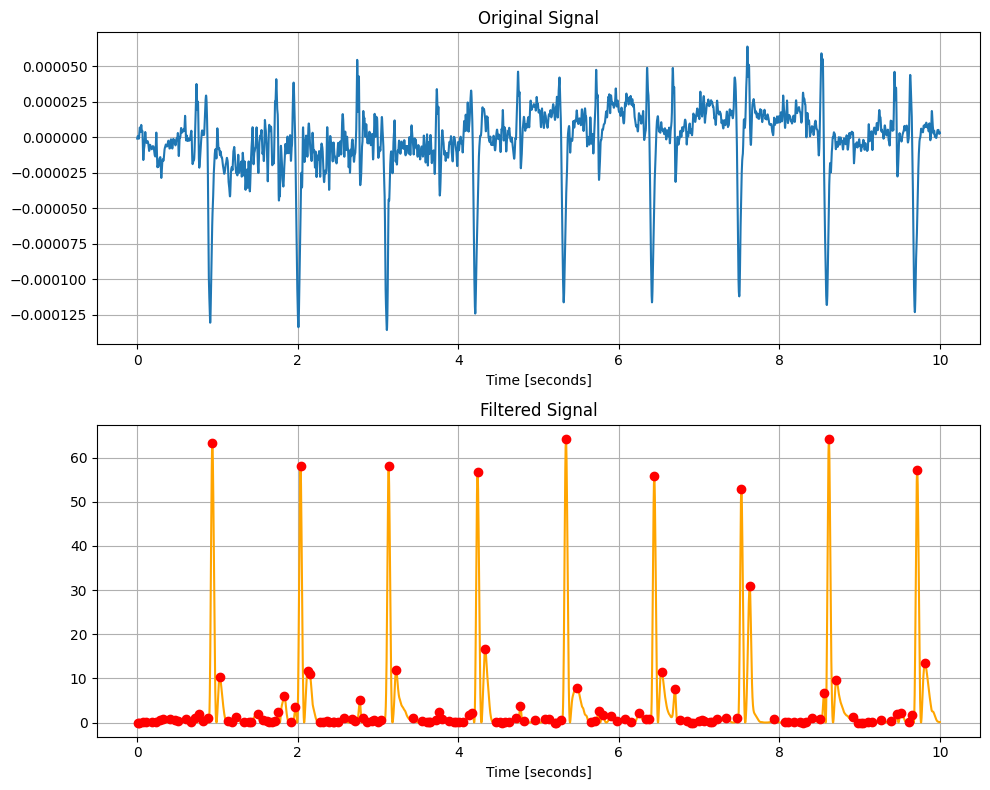

5000

In [3]:
import matplotlib.pyplot as plt

time_len = 5000
t = np.linspace(0, 10, int(time_len), endpoint=False)
print(max_local_extremas[0]/500)


plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t, crop_data, label='Original signal')
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, preprocessed_data, label='Filtered signal (high-pass)', color='orange')
plt.plot(max_local_extremas[0]/500, preprocessed_data[max_local_extremas[0]], 'ro', label='Relative Maxima')
plt.title('Filtered Signal')
plt.xlabel('Time [seconds]')
plt.grid()
plt.tight_layout()
plt.show()

len(preprocessed_data)


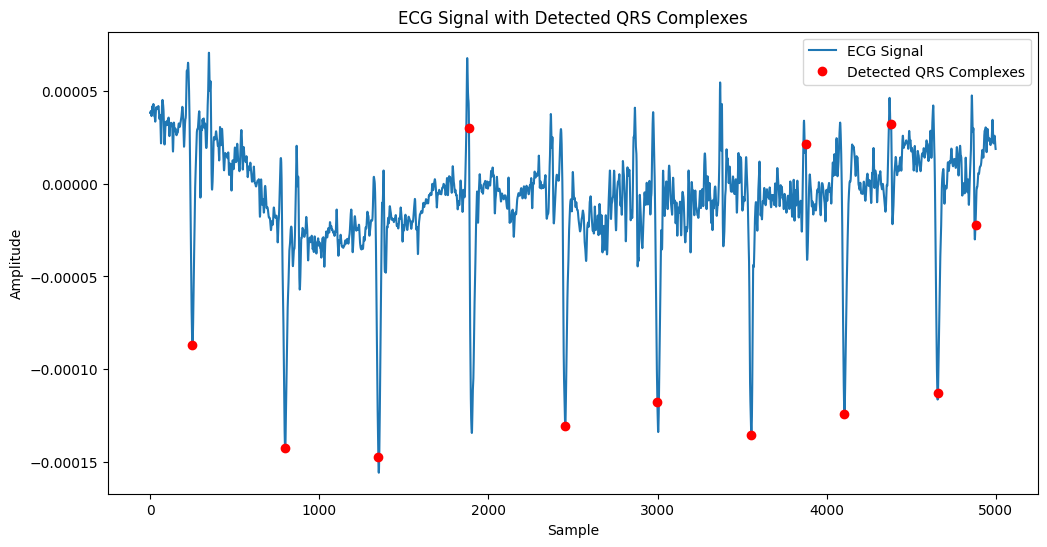

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_qrs(ecg_signal, fs):
    # Step 1: Bandpass Filter (0.5 - 50 Hz) - Simplified version
    from scipy.signal import butter, filtfilt
    def bandpass_filter(signal, lowcut, highcut, fs, order=1):
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        return filtfilt(b, a, signal)
    
    filtered_ecg = bandpass_filter(ecg_signal, 0.5, 50.0, fs, order=1)

    # Step 2: Differentiationdata_MQRS
    diff_ecg = np.diff(filtered_ecg)

    # Step 3: Squaring
    squared_ecg = diff_ecg ** 2

    # Step 4: Moving window integration
    window_size = int(0.12 * fs)  # 120 ms window
    integrated_ecg = np.convolve(squared_ecg, np.ones(window_size)/window_size, mode='same')

    # Step 5: Thresholding
    threshold = np.mean(integrated_ecg) + 0.5 * np.std(integrated_ecg)
    peaks, _ = find_peaks(integrated_ecg, height=threshold, distance=int(0.6 * fs))

    return peaks

raw_direct_fecg_data, raw_abdecg_data_c1, _, _, _ = np.loadtxt('csv_data/r04.csv', delimiter=',', unpack=True).tolist()
data = np.asarray(raw_abdecg_data_c1)
ecg_signal = data[5000:10000]
# Example usage
fs = 360  # Sample rate of the ECG signal in Hz
# ecg_signal = np.load('path_to_your_ecg_signal.npy')  # Load your ECG signal here

qrs_peaks = detect_qrs(ecg_signal, fs)

# Plot the ECG signal and the detected QRS complexes
plt.figure(figsize=(12, 6))
plt.plot(ecg_signal, label='ECG Signal')
plt.plot(qrs_peaks, ecg_signal[qrs_peaks], 'ro', label='Detected QRS Complexes')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Detected QRS Complexes')
plt.show()


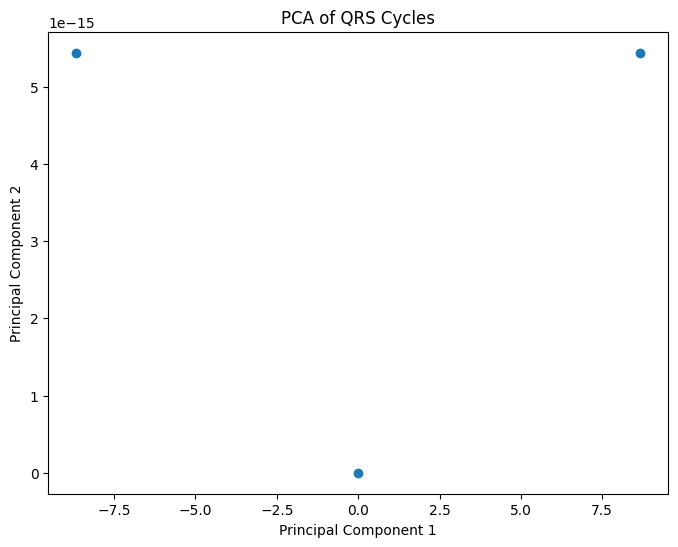

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def extract_and_pca_ecg(mqrs_set, data, start_index, P_Q_duration, total_cycles, cycle_width, n_components=2):
    # Extract QRS cycles
    def get_PCA_array(mqrs_set, data, start_index, P_Q_duration, total_cycles, cycle_width):
        new_index = start_index
        current_index = start_index
        current_MQRS = mqrs_set.iloc[current_index, 0]

        if current_MQRS < cycle_width * P_Q_duration:
            current_index += 1
            new_index = current_index

        QRS_array = [[0 for _ in range(cycle_width)] for _ in range(total_cycles)]

        for i in range(total_cycles):
            current_MQRS = mqrs_set.iloc[current_index, 0]
            data_index = int(current_MQRS - (cycle_width * P_Q_duration))
            for j in range(cycle_width):
                QRS_array[i][j] = data[data_index]
                data_index += 1
            current_index += 1

        return QRS_array, new_index

    QRS_array, new_index = get_PCA_array(mqrs_set, data, start_index, P_Q_duration, total_cycles, cycle_width)
    
    # Convert QRS_array to a DataFrame
    QRS_df = pd.DataFrame(QRS_array)
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_QRS = scaler.fit_transform(QRS_df)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_QRS)
    
    # Convert PCA result to a DataFrame
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    
    return pca_df, pca

# Example usage
mqrs_set = pd.DataFrame({'MQRS': [100, 300, 500, 700, 900]})
data = np.arange(1000)  # Simulating ECG data with values from 0 to 999

# Set parameters
start_index = 0
P_Q_duration = 0.2
total_cycles = 3
cycle_width = 50

# Perform PCA
pca_df, pca = extract_and_pca_ecg(mqrs_set, data, start_index, P_Q_duration, total_cycles, cycle_width, n_components=2)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of QRS Cycles')
plt.show()
